# Iris Task:

In [87]:
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

classmapping = {
    'Iris-setosa': np.array([1, 0, 0]),
    'Iris-versicolor': np.array([0, 1, 0]),
    'Iris-virginica': np.array([0, 0, 1])
}

def GetData():
    x = []
    t = []
    with open('iris.data', 'r') as iris:
        lines = iris.readlines()
        for line in lines:
            line = line.strip('\n')
            if line == '':
                continue
            splt = line.split(',')
            properties = [float(i) for i in splt[:-1]]
            classification = splt[-1]
            x.append(np.array(properties))
            t.append(classmapping.get(classification,''))

    proper_x = []
    proper_t = []
    for i in range(50):
        for j in range(3):
            proper_x.append(x[50*j+i])
            proper_t.append(t[50*j+i])

    x = np.array(proper_x)
    t = np.array(proper_t)

    x = np.true_divide(x, np.amax(x)/2) - 1
    # An extra column of ones is inserted to act as the bias
    x = np.insert(x, x.shape[1], 1, axis=1)
    return x, t

def Decision_rule(W,x):
    x = sigmoid(np.dot(x, W.T))
    if x.ndim == 1:
        return np.argmax(x)
    else:
        return np.argmax(x, axis=1)


def MSE(A,B):
    return ((A-B)**2).mean(axis=1)

def GradMSE(g,t,x):
    grad_mse=g-t
    grad_g=g*(1-g)
    grad_W=x.T
    return np.dot(grad_W, grad_mse*grad_g)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def Training(x,t,a,m):
    W=np.random.normal(0, 1, (3, x.shape[1]))
    MSE_value=[]
    for i in range(m):
        classi=np.dot(x,W.T)
        g=sigmoid(classi)
        W=W-a*GradMSE(g,t,x).T
        MSE_value.append(MSE(g,t).mean())
    return W, MSE_value

def plot_conf(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Gotten from the 'scikit learn', as it would not import.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.subplots(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    # solving a plot cutoff bug
    plt.ylim(len(cm)-0.5, -0.5)
    plt.show()
    
def make_histogram(x,feature,axis):
    max_val = np.amax(data)         # Finds maxvalue in samples
    slice_val = int(len(data)/3)    # slice variables used for slicing samples by class
    
    # Create bins (sizes of histogram boxes)
    bins = np.linspace(0.0 ,int(max_val+step), num=int((max_val/step)+1), endpoint=False)

    legends = ['Class 1: Setosa', 'Class 2: Versicolour', 'Class 3: Virginica']
    colors = ['Red', 'Blue', 'lime']
    features = {0: 'sepal length',
                1: 'sepal width',
                2: 'petal length',
                3: 'petal width'}

    # Slices samples by class
    samples = [data[:slice_val, feature], data[slice_val:2*slice_val, feature], data[2*slice_val:, feature]]

    # Creates plots, legends and subtitles
    for i in range(3):
        plt_axis.hist(samples[i], bins, alpha=0.5, stacked=True, label=legends[i], color=colors[i])
    plt_axis.legend(prop={'size': 7})
    plt_axis.set_title(f'feature {feature+1}: {features[feature]}')

# Part 1
1. The first part has focus on design/training and generalization.
(a) Choose the first 30 samples for training and the last 20 samples for testing.
(b) Train a linear classifier as described in subchapter 2.4 and 3.2. Tune the step factor in equation 19 until the training converge.
(c) Find the confusion matrix and the error rate for both the training and the test set.
(d) Now use the last 30 samples for training and the first 20 samples for test. Repeat the training and test phases for this case.
(e) Compare the results for the two cases and comment

In [93]:
def Part1():
    a=0.5
    m=100

    x,t=GetData()

    #Training 1
    W,mse1=Training(x[:90],t[:90],a,m)

    s=list(range(m))

    #Test 1
    pred=Decision_rule(W,x)
    true=np.argmax(t,axis=1)

    #plot results 1
    cm=confusion_matrix(pred[:90],true[:90])
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plot_conf(cm,classes)
    error=1-np.sum(pred[:90]==true[:90])/len(pred[:90])
    print('Error rate:',error)

    cm=confusion_matrix(pred[90:],true[90:])
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plot_conf(cm,classes)
    error=1-np.sum(pred[90:]==true[90:])/len(pred[90:])
    print('Error rate:',error)

    #Training 2
    W,mse2=Training(x[60:],t[60:],a,m)

    #Test 2
    pred=Decision_rule(W,x)
    true=np.argmax(t,axis=1)

    #plot results 2
    cm=confusion_matrix(pred[60:],true[60:])
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plot_conf(cm,classes)
    error=1-np.sum(pred[60:]==true[60:])/len(pred[60:])
    print('Error rate:',error)

    cm=confusion_matrix(pred[:60],true[:60])
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plot_conf(cm,classes)
    error=1-np.sum(pred[:60]==true[:60])/len(pred[:60])
    print('Error rate:',error)

    #plt.plot(s, mse1, s, mse2)
    #plt.ylim(0, 0.3)
    #plt.show()

# Part 2
2. The second part has focus on features and linear separability. In this part the first 30 samples are used for training and the last 20 samples for test.
(a) Produce histograms for each feature and class. Take away the feature which shows most overlap between the classes. Train and test a classifier with the remaining three features.
Comment: Interpreting this as having to make one (1) set of histograms.
(b) Repeat the experiment above with respectively two and one features.
(c) Compare the confusion matrixes and the error rates for the four experiments. Comment on the property of the features with respect to linear separability both as a whole and for the three separate classes.

In [95]:
def print_hist():
    data = np.genfromtxt('iris.data', dtype='U16', delimiter=',')
    x = data[:, :4].astype('float')
    y = data[:, -1]

    #making histogram
    f, axis = plt.subplots(2,2, sharex='col', sharey='row')
    features = [0,1,2,3]
    f.suptitle('Feature histograms')
    gen_histogram(x, features[0], axis[0,0])
    gen_histogram(x, features[1], axis[0,1])
    gen_histogram(x, features[2], axis[1,0])
    gen_histogram(x, features[3], axis[1,1])

    for ax in axis.flat:
        ax.set(xlabel='Measure [cm]', ylabel='Number of samples')
        ax.label_outer() # Used to share labels on y-axis and x-axis
    plt.show()

In [91]:
def Part2():
    m=1000
    a=0.2
    
    #feature 2 most overlap, then feature 1, then feature 3, then 4
    x,t=GetData()
    
    #train with all features
    #Training 1
    W,mse1=Training(x[:90],t[:90],a,m)

    #Test 1
    pred=Decision_rule(W,x[90:])
    true=np.argmax(t[90:],axis=1)
    
    #Confusion matrix
    cm=confusion_matrix(pred,true)
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plot_conf(cm,classes)
    error=1-np.sum(pred==true)/len(pred)
    print('Error rate:',error)
    
    #Remove feature 2
    x=np.delete(x,1,axis=1)
    
    #retrain with 3 features
    #Training 1
    W,mse1=Training(x[:90],t[:90],a,m)

    #Test 1
    pred=Decision_rule(W,x[90:])
    true=np.argmax(t[90:],axis=1)
    
    #Confusion matrix
    cm=confusion_matrix(pred,true)
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plot_conf(cm,classes)
    error=1-np.sum(pred==true)/len(pred)
    print('Error rate:',error)
    
    #Remove feature 1
    x=np.delete(x,0,axis=1)
    
    #Retrain with 2 features
    #Training 1
    W,mse1=Training(x[:90],t[:90],a,m)

    #Test 1
    pred=Decision_rule(W,x[90:])
    true=np.argmax(t[90:],axis=1)
    
    #Confusion matrix
    cm=confusion_matrix(pred,true)
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plot_conf(cm,classes)
    error=1-np.sum(pred==true)/len(pred)
    print('Error rate:',error)
    
    #Remove feature 3
    x=np.delete(x,0,axis=1)
    
    #Retrain with 1 feature
        #Training 1
    W,mse1=Training(x[:90],t[:90],a,m)

    #Test 1
    pred=Decision_rule(W,x[90:])
    true=np.argmax(t[90:],axis=1)
    
    #Confusion matrix
    cm=confusion_matrix(pred,true)
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    plot_conf(cm,classes)
    error=1-np.sum(pred==true)/len(pred)
    print('Error rate:',error)

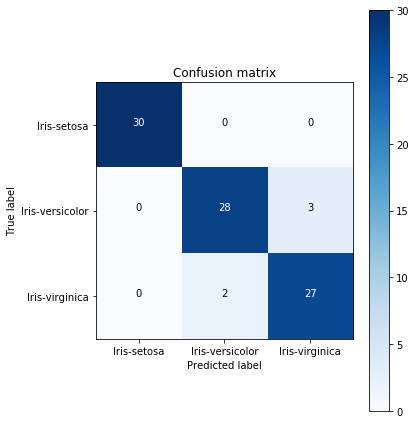

Error rate: 0.05555555555555558


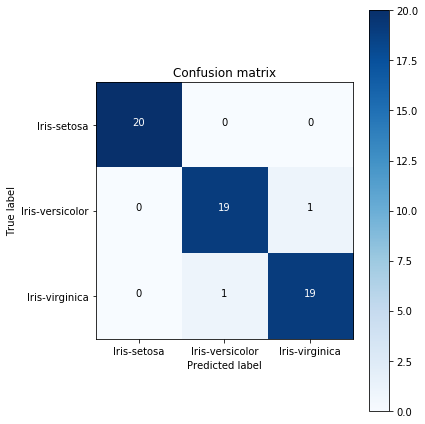

Error rate: 0.033333333333333326


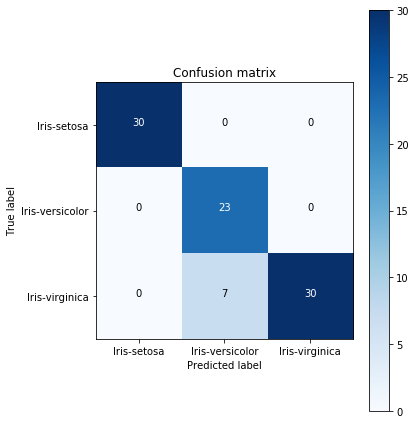

Error rate: 0.07777777777777772


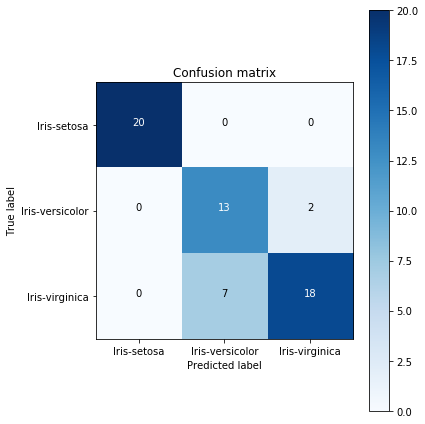

Error rate: 0.15000000000000002


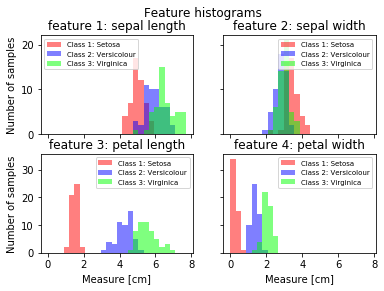

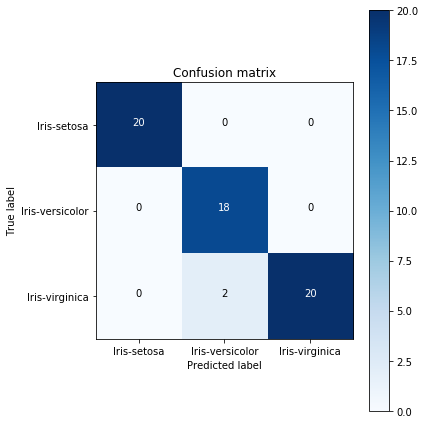

Error rate: 0.033333333333333326


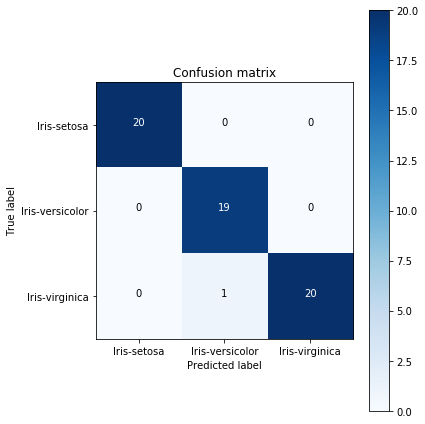

Error rate: 0.01666666666666672


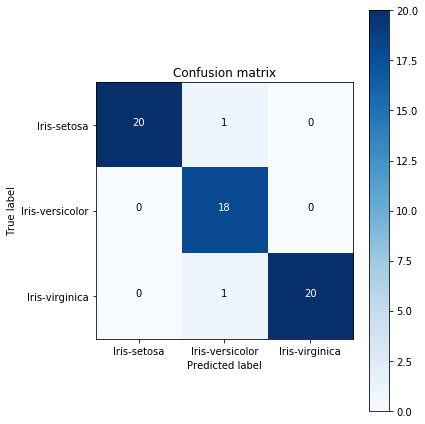

Error rate: 0.033333333333333326


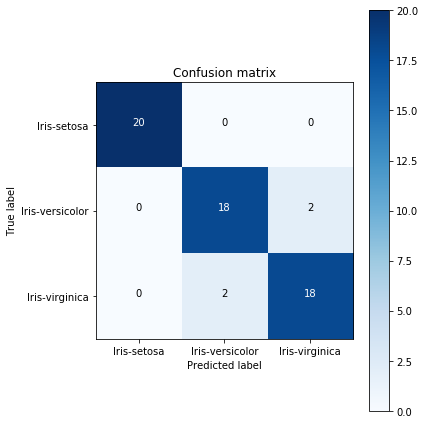

Error rate: 0.06666666666666665


In [96]:
if __name__ == '__main__':
    Part1()
    print_hist()
    Part2()